In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Social_Network_Ads.csv")
from sklearn.model_selection import train_test_split
x = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [2]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)

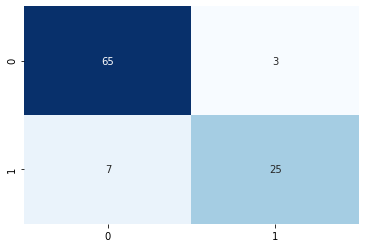

In [3]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, cmap="Blues", cbar = False, annot = True)
plt.show()

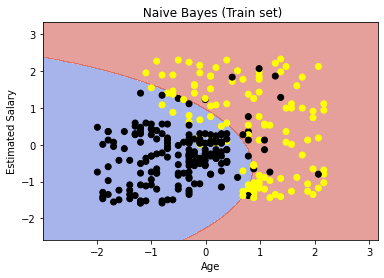

In [5]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() +1, step =.01),
                     np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() +1, step =.01))
plt.contourf(x1, x2, model.predict((np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.5, cmap="coolwarm")
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap="gnuplot")
plt.title(' Naive Bayes (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

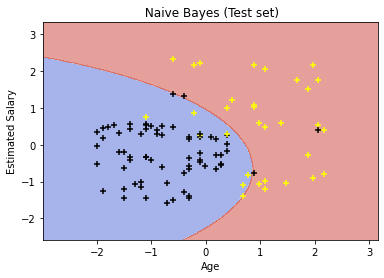

In [11]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() +1, step =.01),
                     np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() +1, step =.01))
plt.contourf(x1, x2, model.predict((np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.5, cmap="coolwarm")
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, cmap="gnuplot",marker="+")
plt.title(' Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()